In [1]:
from wgan import WGAN
from load_dataset import parser, full_parser
import tensorflow as tf
from tensorflow import keras
import pickle

2022-09-28 11:24:24.530483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-28 11:24:25.230912: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-28 11:24:25.230948: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-28 11:24:25.319465: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-28 11:24:26.857105: W tensorflow/stream_executor/platform/de

In [2]:
# Creating GAN
wgan = WGAN()

2022-09-28 11:24:29.708914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-28 11:24:29.709359: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-28 11:24:29.709380: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gaspard-HP-ZBook-15u-G2): /proc/driver/nvidia/version does not exist
2022-09-28 11:24:29.710312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        592       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 zero_padding2d (ZeroPadding  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 17, 17, 32)       128       
 ormalization)                                          

In [3]:
# Importing the dataset
tfile = "/home/gaspard/ETHZ/Master_Arbeit/acoupipe_datasets/training_1-100000_csmtriu_1src_he4.0625-1393.4375Hz_ds1-v001_13-Sep-2022.tfrecord"
dataset = tf.data.TFRecordDataset(filenames=[tfile])

# The parser convert the CSMTRIU into eigenvector (TODO: need to be extended to also extract the eigenvalues.)
dataset = dataset.map(full_parser)
#dataset = dataset.map(parser)

#  Creating the batches
dataset = dataset.shuffle(buffer_size=10).batch(wgan.batch_size)


>epoch 1 [c_real=-1.768][c_fake=-0.333][g=-0.039]
>epoch 2 [c_real=-4.929][c_fake=-1.217][g=0.635]
>epoch 3 [c_real=-7.315][c_fake=-2.551][g=7.681]
>epoch 4 [c_real=-9.367][c_fake=-4.314][g=18.058]
>epoch 5 [c_real=-12.083][c_fake=-6.324][g=22.705]
>epoch 6 [c_real=-14.483][c_fake=-8.295][g=25.193]
>epoch 7 [c_real=-17.289][c_fake=-10.551][g=27.664]
>epoch 8 [c_real=-19.291][c_fake=-13.096][g=26.373]
>epoch 9 [c_real=-21.491][c_fake=-15.655][g=26.423]
>epoch 10 [c_real=-23.785][c_fake=-18.536][g=21.408]
>epoch 11 [c_real=-25.929][c_fake=-21.357][g=20.611]
>epoch 12 [c_real=-27.616][c_fake=-23.876][g=18.568]
>epoch 13 [c_real=-29.954][c_fake=-26.741][g=16.154]
>epoch 14 [c_real=-31.691][c_fake=-28.907][g=15.873]
>epoch 15 [c_real=-33.670][c_fake=-31.286][g=14.636]
>epoch 16 [c_real=-34.605][c_fake=-33.549][g=12.500]
>epoch 17 [c_real=-35.985][c_fake=-35.552][g=12.599]
>epoch 18 [c_real=-37.507][c_fake=-37.578][g=12.192]
>epoch 19 [c_real=-38.961][c_fake=-39.517][g=12.608]
>epoch 20 [c_r

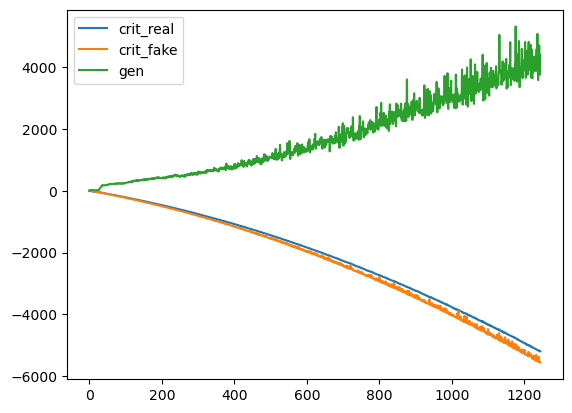

In [4]:
# Training the GAN
wgan.train(n_epochs=1245
, dataset=dataset)

In [5]:
# backup wgan
file_to_store = open("backup_wgan.pickle", "wb")
pickle.dump(wgan, file_to_store)
file_to_store.close()

AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'

In [ ]:
# get wgan from backup
file_to_read = open("backup_wgan.pickle", "rb")
generated_backup = pickle.load(file_to_read)
file_to_read.close()

In [6]:
import matplotlib.pyplot as plt

# Generating a sample:
generated = wgan.get_sample()

if generated != None:
    evecs_r = generated[0,:,:,0]
    evecs_i = generated[0,:,:,1]
    evals_r = generated[0,:,:,2]
    evals_i = generated[0,:,:,3]

    fig = plt.figure(figsize=(15,15))
    plt.subplot(2,2,1)
    plt.imshow(evecs_r)
    plt.subplot(2,2,2)
    plt.imshow(evecs_i)
    plt.subplot(2,2,3)
    plt.imshow(evals_r)
    plt.subplot(2,2,4)
    plt.imshow(evals_i)


1/1 [==============================] - 0s 226ms/step
tf.Tensor(-3792.616, shape=(), dtype=float32)
1/1 [==============================] - 0s 65ms/step
tf.Tensor(-3634.055, shape=(), dtype=float32)
1/1 [==============================] - 0s 52ms/step
tf.Tensor(-3662.2598, shape=(), dtype=float32)
1/1 [==============================] - 0s 52ms/step
tf.Tensor(-3657.6409, shape=(), dtype=float32)
1/1 [==============================] - 0s 55ms/step
tf.Tensor(-3723.0137, shape=(), dtype=float32)
1/1 [==============================] - 0s 53ms/step
tf.Tensor(-3821.7659, shape=(), dtype=float32)
1/1 [==============================] - 0s 53ms/step
tf.Tensor(-3827.8604, shape=(), dtype=float32)
1/1 [==============================] - 0s 48ms/step
tf.Tensor(-3609.2104, shape=(), dtype=float32)
1/1 [==============================] - 0s 53ms/step
tf.Tensor(-3672.2747, shape=(), dtype=float32)
1/1 [==============================] - 0s 56ms/step
tf.Tensor(-3788.0063, shape=(), dtype=float32)
1/1 [======

In [ ]:
# Backup of generated sample
import pickle

file_to_store = open("backup_generated.pickle", "wb")
pickle.dump(generated, file_to_store)
file_to_store.close()


In [ ]:
# restauring file from backup
file_to_read = open("backup_generated.pickle", "rb")
generated_backup = pickle.load(file_to_read)
file_to_read.close()

In [ ]:
from beamforming import beamform

beamform(generated_backup)